In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from main_grape.Grape import Grape
from helper_functions.grape_functions import transmon_gate, get_state_index, get_dressed_info
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
total_time = 12.0
steps = 400
qubit_state_num = 4

#Defining H0
alpha = 0.224574
freq_ge = 3.9#GHz
ens_1 = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
H0_1 = np.diag(ens_1)

alpha = 0.224574
freq_ge = 3.5#GHz
ens_2 = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
H0_2 = np.diag(ens_2)

g = 2*np.pi*0.1

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
Q_I   = np.identity(qubit_state_num)


H0 = np.kron(H0_1,Q_I) + np.kron(Q_I,H0_2) + g * np.kron(Q_x,Q_x)

D = True

w_c, v_c, dressed = get_dressed_info(H0,D)

print dressed


#Defining Concerned states (starting states)
psi0 = [0,1,4,5]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,4,5]
states_draw_names = ['00','01','10','11']
states_forbidden_list = [3,7,11,12,13,14,15]
#Defining U (Target)
p2 = get_state_index(5,dressed)
p3 = get_state_index(4,dressed)

if D:
    U = np.identity(16)
    U = U - np.outer(v_c[:,p2],v_c[:,p2])
    U = U - np.outer(v_c[:,p3],v_c[:,p3])
    U = U + np.outer(v_c[:,p3],v_c[:,p2])
    U = U + np.outer(v_c[:,p2],v_c[:,p3])
else:   
    U= np.identity(4)
    U[2,2] = 0
    U[3,3] = 0
    U[2,3] = 1
    U[3,2] = 1
    U = transmon_gate(U,qubit_state_num)



Q_x1 = np.kron(Q_x,Q_I)
Q_y1 = np.kron(Q_y,Q_I)
Q_z1 = np.kron(Q_z,Q_I)
Q_x2 = np.kron(Q_I,Q_x)
Q_y2 = np.kron(Q_I,Q_y)
Q_z2 = np.kron(Q_I,Q_z)

Hops = [Q_x1,Q_y1,Q_x2,Q_y2,Q_z2]
ops_max_amp = [2.0,2.0,2.0,2.0,2.0]
Hnames =['x1','y1', 'x2','y2','z2']

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-3,'learning_rate_decay':decay}
reg_coeffs = {'envelope' : 0, 'dwdt':0.01,'d2wdt2':0.0001*0.0001, 'forbidden':100,
             'states_forbidden_list': states_forbidden_list }

print H0_1
print H0_2
print dressed

def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None
#for ii in range (len(dressed)):
    #print np.max(np.abs(v_c[:,dressed[ii]])), second_largest(np.abs(v_c[:,dressed[ii]])), dressed[ii],np.argmax(np.abs(v_c[:,get_state_index(ii,dressed)]))
dressed_info = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': 0,\
              'f':freq_ge, 'es':w_c, 'g1':g, 'D':D, 'Interpolation':False, 'Modulation':False}

print np.dot(U,v_c[:,get_state_index(4,dressed)])
print v_c[:,get_state_index(5,dressed)]

[0, 15, 2, 5, 8, 13, 10, 7, 1, 4, 14, 11, 3, 6, 9, 12]
[[  0.           0.           0.           0.        ]
 [  0.          24.5044227    0.           0.        ]
 [  0.           0.          47.59780534   0.        ]
 [  0.           0.           0.          69.28014792]]
[[  0.           0.           0.           0.        ]
 [  0.          21.99114858   0.           0.        ]
 [  0.           0.          42.57125709   0.        ]
 [  0.           0.           0.          61.74032555]]
[0, 15, 2, 5, 8, 13, 10, 7, 1, 4, 14, 11, 3, 6, 9, 12]
[ -1.13212777e-02  -3.60822483e-16  -2.05753029e-01  -5.52672057e-17
  -1.31838984e-16  -8.31309123e-01  -2.08275237e-16   4.66006495e-03
   5.15448198e-01   1.04083409e-17   2.40477583e-02   5.20417043e-18
  -6.30192513e-19  -1.32484475e-02  -5.08219768e-19  -5.34012330e-04]
[ -1.13212777e-02  -3.35873681e-16  -2.05753029e-01  -5.52709086e-17
  -1.49882436e-17  -8.31309123e-01  -2.08543218e-16   4.66006495e-03
   5.15448198e-01   1.20209195e-1

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Error = 2.12e-03
Total time is 153.835264921


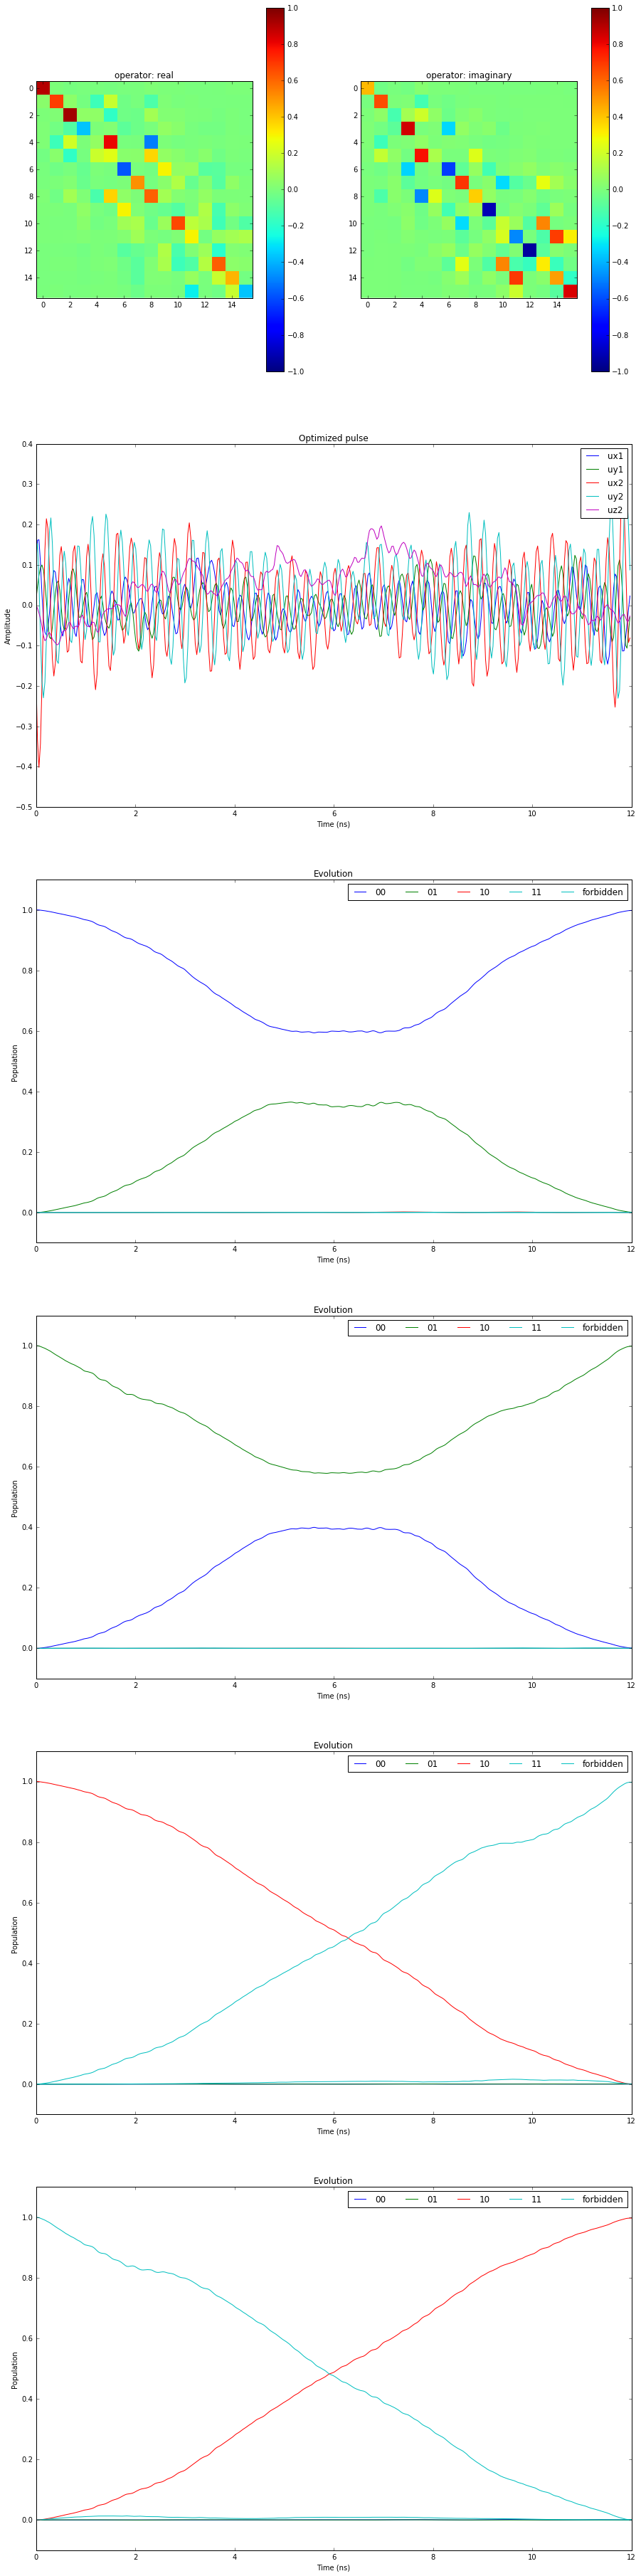

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_f =Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, method = 'L-BFGS-B',switch=False, draw = [states_draw_list,states_draw_names] ,
               maxA = ops_max_amp, use_gpu=True, reg_coeffs=reg_coeffs, unitary_error = 1e-08, show_plots = False, dressed_info = dressed_info,
               file_name='transmon_transmon_CNOT', data_path = '/home/nelson/Simulations/GRAPE-Data')